# Part I - FordGo Bike Data Exploration
## by Onome David Omoghene

## Introduction
This is a dataset from a bike share company base in San Francisco, California. The dataset contains information about ride duration, client gender and age, start and end station details, client type (customer or subscriber) and bike id.
We'll be exploting this data to see what insights we can generate.

## Contents:

1. [Load and Access Data](#Load-and-Access-Data)
2. [Data Wrangling](#Data-Wrangling)
3. [Univariate Exploration](#Univariate-Exploration)
4. [Bivariate Exploration](#Bivariave-Exploration)
5. [Multivariate Exploration](#Multivariate-Exploration)
6. [Conclusions](#Conclusions)


## Load and Access Data

In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [53]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [54]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [55]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [56]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

This dataset contains ~183k rows of ride information from a bike sharing company in San Francisco. There are 16 columns that describe details like start and end times, start and end stations, ages and genders of the riders, and whether they're a one-off customer or paying subscriber. There's also bike ID for each ride, and geographical information

### What is/are the main feature(s) of interest in your dataset?

Being a business owner myself, I want to find out what percentage of implied revenue comes from subscribers and what comes from customers. I also want to see the ages of the majority of riders, and their gender, and see how these affect customership.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Data for all these variables is present in the dataset, thankfully, and with a little wrangling, I'm confident I can immediately begin to gather insight

## Data Wrangling

In [57]:
# Create dataset copy to work with, so as to have the original intact

bike = bike_data.copy()

In [58]:
# There are a few columns with NaNs. Eliminate those

bike = bike.dropna()

In [59]:
# Correct a few dtypes. Start and end times to datetime

bike.start_time = pd.to_datetime(bike['start_time'])
bike.end_time = pd.to_datetime(bike['end_time'])

In [60]:
# Gender to categorical

bike.member_gender = bike.member_gender.astype('category')

In [61]:
#Birth year to int

bike.member_birth_year = bike.member_birth_year.astype('int')

In [62]:
# User type to categorical

bike.user_type = bike.user_type.astype('category', ordered = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# The minimum birth year is 1878, which I suspect is a typo and is supposed to be 1978. We'll change that.

bike.member_birth_year.replace(1878, 1978, inplace = True)

In [64]:
# There are other entries in this column which are almost certainly inaccurate. To get our data as clean as possible, we'll remove all rows with years < 1949 (making the rider 70 years old) 

bike.drop(bike.loc[bike['member_birth_year']<= 1949].index, inplace=True)

In [65]:
# Start and end station ids to ints, and then to categories

bike.start_station_id = bike.start_station_id.astype('int').astype('category')
bike.end_station_id = bike.end_station_id.astype('int').astype('category')

In [66]:
# Bike ID to category

bike.bike_id = bike.bike_id.astype('category')

### Test wrangling success

In [67]:
bike.info()
bike.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174279 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174279 non-null int64
start_time                 174279 non-null datetime64[ns]
end_time                   174279 non-null datetime64[ns]
start_station_id           174279 non-null category
start_station_name         174279 non-null object
start_station_latitude     174279 non-null float64
start_station_longitude    174279 non-null float64
end_station_id             174279 non-null category
end_station_name           174279 non-null object
end_station_latitude       174279 non-null float64
end_station_longitude      174279 non-null float64
bike_id                    174279 non-null category
user_type                  174279 non-null category
member_birth_year          174279 non-null int64
member_gender              174279 non-null category
bike_share_for_all_trip    174279 non-null object
dtypes: category(5), datetime64[ns](2), float64(4), int64(2),

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174279.000000,174279.000000,174279.000000,174279.000000,174279.000000,174279.000000
mean,704.260353,37.771181,-122.351742,37.771377,-122.351318,1984.981512
std,1644.651576,0.100458,0.117790,0.100363,0.117352,9.679372
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1950.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,511.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


We now have a clean and tidy dataset to work with

## Univariate Exploration



### Q1
What user type has more rides?


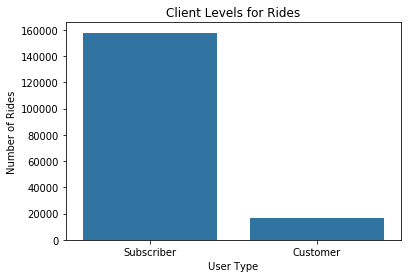

In [68]:
cust_count = bike['user_type'].value_counts()
cust_order = cust_count.index
base_color = sb.color_palette()[0]
sb.countplot(bike.user_type, color = base_color, order = cust_order)
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.title('Client Levels for Rides');

### A1

As I expected, subscribers prove to be the most loyal and bigger revenue source with slightly under 160,000 rides.

### Q2

Did women use the service more than men?

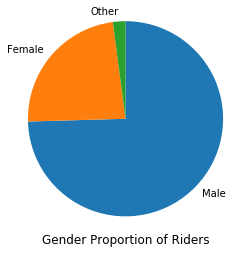

In [69]:
gend_count = bike['member_gender'].value_counts()

plt.pie(gend_count, labels = gend_count.index, startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Gender Proportion of Riders', x=0.5,y=-0.1);

### A2

We see that about 72% of rides were taken by men

### Q3

What is the age distribution of riders?

In [70]:
# Add an age column to bike

bike['age'] = 2019 - bike['member_birth_year']

In [71]:
# Create a range column for the ages

bike['age_range'] = np.where(bike['age'].between(18,29), '20s',
                          np.where(bike['age'].between(30,49), '30s',
                                   np.where(bike['age'].between(40,49), '40s',
                                            np.where(bike['age'].between(50,59), '50s',
                                                     np.where(bike['age'].between(60,69), '60s', '')))))

In [72]:
# Convert to category

bike['age_range'] = bike['age_range'].astype('category')

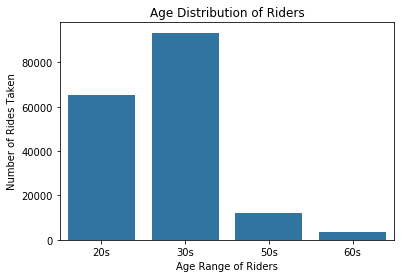

In [73]:
sb.countplot(bike.age_range, color = base_color)
plt.xlabel('Age Range of Riders')
plt.ylabel('Number of Rides Taken')
plt.title('Age Distribution of Riders');

### A3

We see that clients in their 30's make up the majority of rides at around 9,000, and those in their 60s make up the minority. There doesn't seem to be anyone in their 40s for some reason. Are they probably in that sweet spot where they want to enjoy the money they've made in their youth by commuting in cars, and not yet old enough to 'need' the exercise that comes with a bike?

### Q4

What is the typical duration of rides?


In [74]:
bike_data.duration_sec.isnull().any()

False

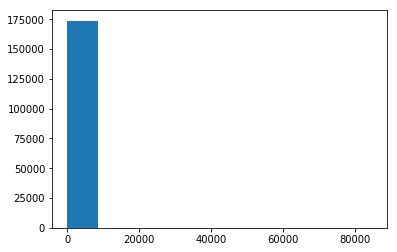

In [75]:
plt.hist(bike.duration_sec);

### Observation

As seen in the wrangling assessment, there's a long tail in this variable, for people who took exceptionally long rides. To get a clearer picture of the more general distribution, we'll change bin size and set limits

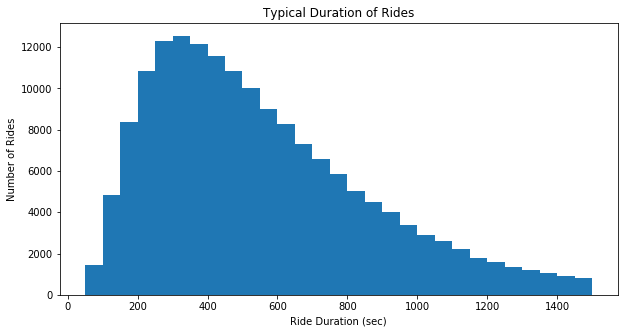

In [76]:
binsize = 50
bins = np.arange(50, 1500+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration (sec)')
plt.ylabel('Number of Rides')
plt.title('Typical Duration of Rides')
plt.show()

### A4

This gives us a unimodal distribution, with a peak around 6 minutes making 7% of total rides, and a mean of around 11.5 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The ride duration distribution was a little unusual. I would have expected rides to last upwards of 10-15 minutes. Turns out, the peak of the distribution is at 6 minutes. This begs the question, where are these people going? According to bikethesites.com, average cycling speed is 12-18mph, so a leisurely 10mph ride would be just about a mile's distance in 6 minutes. Without knowing all the other variables involved, I'd much rather walk that cycle for a mile or 2, but that's just me.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As expected, subscribers account for a vast majority of rides taken, and most of the riders are men. What was a little strange, though, was the absence of any 40-year-olds among the riders. A whole 10-year age range missing is definitely something to look into. To better understand this, one may need to look into the town's demographic data and and other, bigger datasets.
I had to create age range data in order to plot the ages, and convert those to categorical dtype.

## Bivariate Exploration


### Q5

Let's start out this section with exploring the relationship between rider age and ride duration

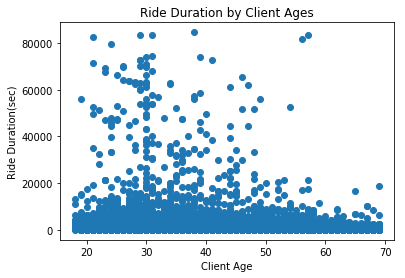

In [77]:
plt.scatter(x= bike['age'], y = bike['duration_sec'])
plt.xlabel('Client Age')
plt.ylabel('Ride Duration(sec)')
plt.title('Ride Duration by Client Ages');

###  Observation

We run into the same tail issue again. We'll fix this by setting an axis limit like before, and using  transparency for the parts that look super dense. We need to set the transparency very high to make any sense of the distribution.

It is worthy of note, however, that there's a pretty huge spike in ride time at 30 years, and that there are some ~60-year-olds giving hot pursuit to their kids!

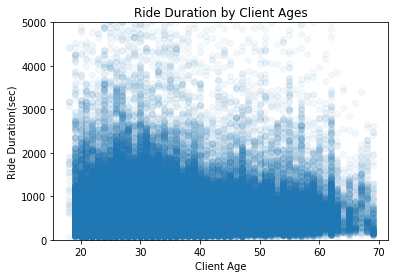

In [78]:
plt.scatter(x= bike['age'], y = bike['duration_sec'], alpha = 0.05)
plt.ylim(0,5000)
plt.xlabel('Client Age')
plt.ylabel('Ride Duration(sec)')
plt.title('Ride Duration by Client Ages');

### A5

This doesn't seem to do much more than show us a slight decline in ride time as age increases. Ride time peaks around 25 years, at a little over 40 minutes and slopes to 15 minutes by age 63. There are a few spikes, though, notably at 30 years, 40, ~47, ~55, ~63 and ~68, but these aren't really clear. There also seems to be a significant dip around 41 years, which is what we observed in the univariate section with the absence of 40-year-olds.
Somewhere in the bottom right, it seems to show that the riders above 60 didn't take any short rides. That's pretty interesting, but it abruptly ends just before 70.

### Q6

What time of day were the longest rides started?

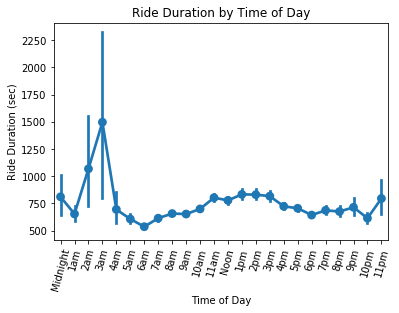

In [79]:
sb.pointplot(x = bike.start_time.dt.hour, y = "duration_sec",
             data = bike)
plt.xlabel('Time of Day')
plt.ylabel('Ride Duration (sec)')
plt.title('Ride Duration by Time of Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ['Midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', 'Noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], rotation = 75);

### A6

This seems to show, surprisingly, not just that some rides were _started_ at 3am, but they were the longest rides. Makes one wonder what circumstances were involved. There are similar spikes at 2am and midnight too, and one by 11pm. Weird city!

We do have regular folk, though, between 10am and 6pm, who ride between 10 and 15 minutes.

### Q7

How long did men and women ride on average?

In [80]:
gender_dur = bike.groupby('member_gender')['duration_sec'].mean()

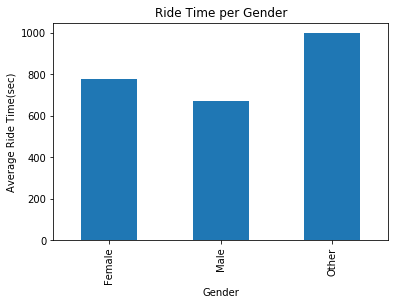

In [81]:
gender_dur.plot(kind = 'bar', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Average Ride Time(sec)')
plt.title('Ride Time per Gender');

### Observation

This shows men having the lowest average ride time, and others having the highest. Knowing the proportion above, of riders from each gender helps put this in clearer perspective, though. The higher the sample population, the lower the average ride time.

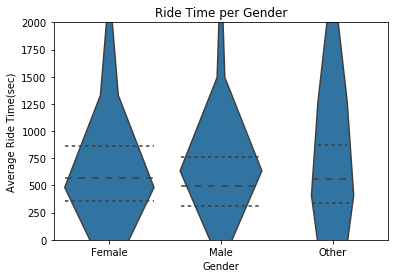

In [82]:
sb.violinplot(data = bike, x = 'member_gender', y = 'duration_sec', color = base_color, inner = 'quartile')
plt.ylim(0,2000)
plt.xlabel('Gender')
plt.ylabel('Average Ride Time(sec)')
plt.title('Ride Time per Gender');

### A7

Plotting against total ride time instead of average gives us a clearer picture of the data. We see the means in the same place as in the bar chart, but we also see the distribution in better detail.

### Q8

What's the gender variation among subscribers and customers?

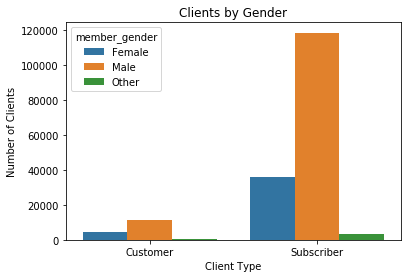

In [83]:
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender')
plt.xlabel('Client Type')
plt.ylabel('Number of Clients')
plt.title('Clients by Gender');

### A8

There are more male clients on both sides, but the proportion is even higher among subscribers. 

### Q9

We could probably do the same thing for age distribution among genders.

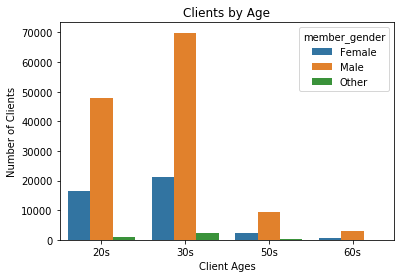

In [84]:
sb.countplot(data = bike, x = 'age_range', hue = 'member_gender')
plt.xlabel('Client Ages')
plt.ylabel('Number of Clients')
plt.title('Clients by Age');

### A9

Again, expected results. But this makes the 60-year-olds doing long rides even more special, since they're the smallest demographic. We also see that most of the 'other' gender is in their 30s.

A few things we've not explored are the stations and how they compare to each other. Because we have over 300 stations, which wouldn't fit in a categorical plot, we must take the top 10 trip origins, or the ones with minimum 2,000 trips

In [85]:
bike.start_station_name.value_counts()

Market St at 10th St                                               3644
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3385
Berry St at 4th St                                                 2931
Montgomery St BART Station (Market St at 2nd St)                   2705
Powell St BART Station (Market St at 4th St)                       2611
San Francisco Caltrain (Townsend St at 4th St)                     2552
San Francisco Ferry Building (Harry Bridges Plaza)                 2526
Howard St at Beale St                                              2210
Steuart St at Market St                                            2181
Powell St BART Station (Market St at 5th St)                       2141
The Embarcadero at Sansome St                                      1974
Bancroft Way at Telegraph Ave                                      1757
Bancroft Way at College Ave                                        1707
2nd St at Townsend St                                           

In [86]:
match = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St', 'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)', 'San Francisco Caltrain (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'Howard St at Beale St', 'Steuart St at Market St', 'Powell St BART Station (Market St at 5th St)']
bike['isContained'] = bike['start_station_name'].apply(lambda x: 1 if any(s in x for s in match) else 0)

In [87]:
contain = bike[bike['isContained'] == 1]
contain.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_range,isContained
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,30s,1
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992,Female,No,27,20s,1
42,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5411,Subscriber,1972,Male,No,47,30s,1
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58,Market St at 10th St,37.776619,-122.417385,62,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990,Female,No,29,20s,1
63,239,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343,Bryant St at 2nd St,37.783172,-122.393572,5731,Subscriber,1986,Male,No,33,30s,1


### Q10

First, we'll see which stations had the longest trips.

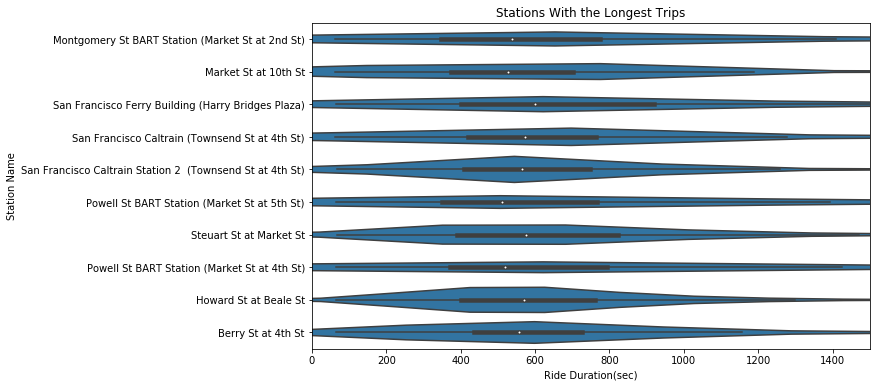

In [88]:
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize=(10,6))
ax = sb.violinplot(ax = ax, data = contain, x = 'duration_sec', y = 'start_station_name', color = base_color)
plt.xlim(0,1500)
plt.xlabel('Ride Duration(sec)')
plt.ylabel('Station Name')
plt.title('Stations With the Longest Trips');

### A10

It would seem San Francisco Ferry Building has the highest average ride duration among the 10 stations.

### Q 11

Let's now see which station had the most rides

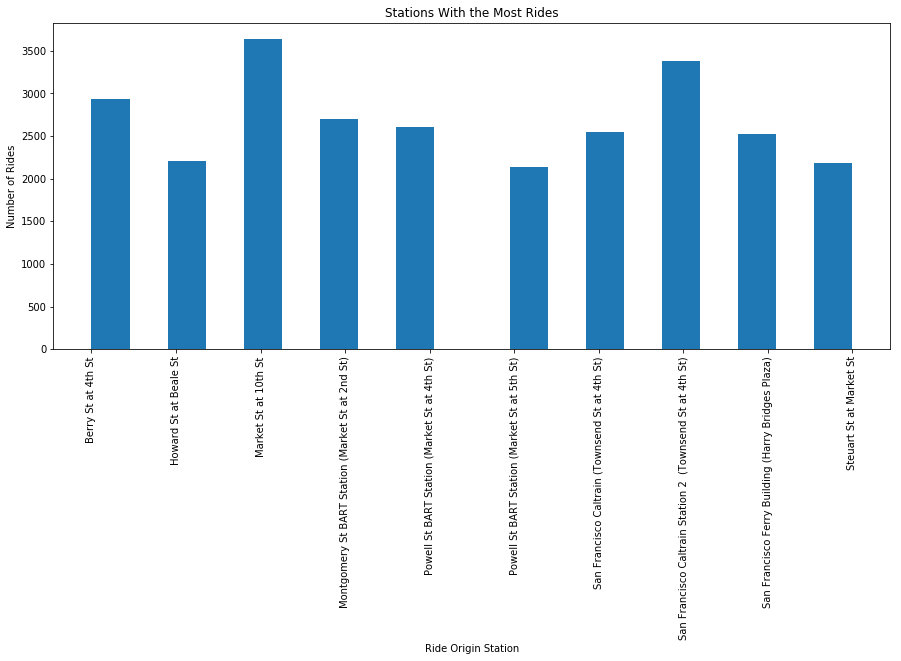

In [89]:
plt.figure(figsize = (15, 6))
plt.hist(data = contain, x = 'start_station_name', bins = 20)
plt.xticks(rotation = 90)
plt.xlabel('Ride Origin Station')
plt.ylabel('Number of Rides')
plt.title('Stations With the Most Rides');

### A11

Here it seems Market St at 10th St was the favorite ride origin for the company

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We saw that riders in their 30s and 40s rode longer than older riders, as expected, but we also had some ouliers of ~60-year-olds riding just as much. 
Men make up the majority of clients, but moreso among Subscribers. We also learned that women, on the average, had longer ride times than men.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The longest rides started at 3am! Not just that, most of the longer rides started at and around midnight.

## Multivariate Exploration


In [90]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174279 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174279 non-null int64
start_time                 174279 non-null datetime64[ns]
end_time                   174279 non-null datetime64[ns]
start_station_id           174279 non-null category
start_station_name         174279 non-null object
start_station_latitude     174279 non-null float64
start_station_longitude    174279 non-null float64
end_station_id             174279 non-null category
end_station_name           174279 non-null object
end_station_latitude       174279 non-null float64
end_station_longitude      174279 non-null float64
bike_id                    174279 non-null category
user_type                  174279 non-null category
member_birth_year          174279 non-null int64
member_gender              174279 non-null category
bike_share_for_all_trip    174279 non-null object
age                        174279 non-null int64
age_range   

### Q12

Let's put one of the main curiosities to test now. How many of those long late night rides were actually rides, and how many were just long rent times?

(0, 3000)

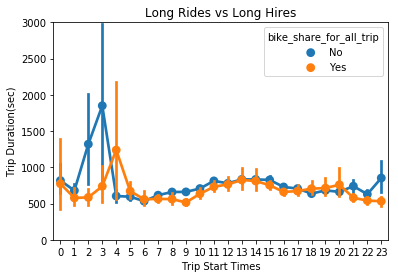

In [91]:
sb.pointplot(data = bike, x = bike['start_time'].dt.hour, y = 'duration_sec', hue = 'bike_share_for_all_trip' )
plt.xlabel('Trip Start Times')
plt.ylabel('Trip Duration(sec)')
plt.title('Long Rides vs Long Hires')
plt.ylim(0,3000)

### A12

It would appear those long rides were mostly just long hire periods and not fully rides. There's still a decent amount of long night rides, but not quite as much as we'd assumed earlier. 

### Q 13

Something we've not looked at is trip end times. 

(0, 3000)

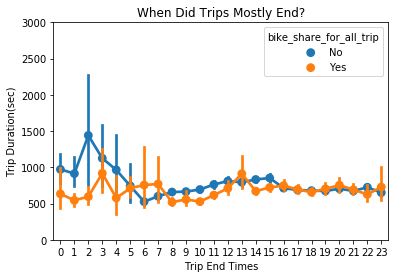

In [92]:
sb.pointplot(data = bike, x = bike['end_time'].dt.hour, y = 'duration_sec', hue = 'bike_share_for_all_trip' )
plt.xlabel('Trip End Times')
plt.ylabel('Trip Duration(sec)')
plt.title('When Did Trips Mostly End?')
plt.ylim(0,3000)

### A13

Again, most trips ended at night. But mostly at 2am, 1 hour before the other ones began. Meaning these are not the same riders. But this plot seems to show that there was almost no break between when trips ended and when new trips were started. Bike sharing must be good business! 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We didn't have much to investigate here, due to the nature od the dataset and datatypes. However, we settled the mystery of the late night rides.

## Conclusions

This was an interesting dataset to explore, with a few oddities. We saw the gender distribution between riders; we saw that subscribers made up a majority of the rides; women rode longer, on average, than men, and that the station with the most rides wasn't the one with the longest rides. 
We saw some seniors riding just as long as 30-year-olds, and that a considerable number of rides were begun (and ended) around midnight, men took more rides than women, and average ride time was 11.5 minutes.

We did have to cut out a sizeable chink of the dataset that had missing information, and change the dtypes for many of the columns, and to get the top stations, we had to select only ten so that they were plotable. These may be limitations in the data for which we need more research.


In [93]:
bike.to_csv('bike_data.csv')